<a href="https://colab.research.google.com/github/elliotmic/libattery_rul_prediction/blob/main/Analysis_on_battery_data_TEST180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEST180



In [ ]:
# Import the pandas module
import pandas as pd
# Import the DataFrame
from google.colab import drive
drive.mount('/content/drive')
df1 =pd.read_csv("/content/drive/MyDrive/df_combined_dropped.csv")
# Print the DataFrame
df1

Mounted at /content/drive


,Total Time (Seconds),Voltage (V),Current (A),Charge Capacity (mAh),Discharge Capacity (mAh),TC1 (°C)
0,0.100,3.258480,0.000000,0.000,0.000,22.7
1,0.200,3.258463,0.000000,0.000,0.000,22.7
2,0.300,3.258475,0.000000,0.000,0.000,22.7
3,0.400,3.258463,0.000000,0.000,0.000,22.7
4,0.500,3.258642,0.000000,0.000,0.000,22.7
...,...,...,...,...,...,...
27445949,63314.700,2.883094,0.000000,15279.078,15253.381,24.7
27445950,63314.800,2.883165,0.000000,15279.078,15253.381,24.7
27445951,63314.900,2.882987,0.000000,15279.078,15253.381,24.7
27445952,63315.000,2.883590,-0.000114,15279.078,15253.381,24.7


# Split the DataFrame into training and testing sets

In [ ]:
# Define the split point, optimally 80%
split_pct = 0.8

# Sort the DataFrame by a time metric
df_sorted = df1.sort_values(by='Total Time (Seconds)')

# Calculate the index for the split point
split_idx = int(len(df_sorted) * split_pct)

# Split the DataFrame into training and testing sets
df_train = df_sorted.iloc[:split_idx]
df_test = df_sorted.iloc[split_idx:]

# Show the shape of the data
print("Training dataset shape:", df_train.shape)
print("Testing dataset shape:", df_test.shape)
print("Total dataset shape:", df_sorted.shape)

Training dataset shape: (21956763, 6)
Testing dataset shape: (5489191, 6)
Total dataset shape: (27445954, 6)


# *Converting into training and testing df

In [ ]:
# Convert the splitted files into csv files
df_train.to_csv('trainingdata.csv', index=False)
df_test.to_csv('testingdata.csv', index=False)

NameError: name 'df_train' is not defined

# Defining the variables

In [ ]:
X = df1.drop('Voltage (V)', axis=1)
y = df1['Voltage (V)']

In [ ]:
X_df= df1

In [ ]:
# Training model variables
# Drops only the target feature, including every other feature
X_train = df_train.drop('Voltage (V)', axis=1)


# This variable is the target feature
y_train = df_train["Voltage (V)"]

In [ ]:
# Testing model variables
# same features dropped and included in each variable

X_test = df_test.drop('Voltage (V)', axis=1)


# This variable is the target feature
y_test = df_test["Voltage (V)"]

# Read training and testing df

In [ ]:
# Reads the DataFrames
# Import the pandas module
import pandas as pd
# Import the DataFrame
from google.colab import drive
drive.mount('/content/drive')
trainingdf=pd.read_csv("/content/drive/MyDrive/trainingdata_test180.csv")
testingdf=pd.read_csv("/content/drive/MyDrive/testingdata_test180.csv")
# Print the DataFrame


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainingdf

,Total Time (Seconds),Voltage (V),Current (A),Charge Capacity (mAh),Discharge Capacity (mAh),TC1 (°C)
0,0.1,3.258480,0.00000,0.000,0.000,22.7
1,0.1,3.296307,0.00000,0.000,0.000,24.0
2,0.1,3.242612,0.00000,0.000,0.000,24.1
3,0.1,3.345088,0.00000,0.000,0.000,24.0
4,0.1,3.237652,0.00000,0.000,0.000,23.7
...,...,...,...,...,...,...
21956758,54890.9,2.749888,-0.05045,12229.302,12205.686,26.3
21956759,54890.9,4.200008,5.06700,13528.608,12476.642,36.6
21956760,54890.9,4.200195,0.67450,11777.317,9604.889,26.2
21956761,54890.9,4.200130,1.60600,14659.100,12558.608,29.5


In [ ]:
testingdf

,Total Time (Seconds),Voltage (V),Current (A),Charge Capacity (mAh),Discharge Capacity (mAh),TC1 (°C)
0,54890.900,2.749722,-0.934500,12266.779,12145.552,35.6
1,54890.900,4.200011,4.010100,14148.633,12612.635,32.7
2,54890.900,4.005660,2.599600,9651.168,9098.405,30.2
3,54890.900,4.056676,3.793300,13435.882,12647.628,32.4
4,54890.900,3.624832,-2.600000,12094.319,10491.972,29.4
...,...,...,...,...,...,...
5489186,80598.700,2.904861,0.000000,13639.131,13634.177,25.9
5489187,80598.800,2.905281,-0.000118,13639.131,13634.177,25.9
5489188,80598.800,2.905281,-0.000118,13639.131,13634.177,25.9
5489189,80598.878,2.905376,-0.000100,13639.131,13634.177,25.9


# Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression Model
lr = LinearRegression()
# Here we are fitting the DataFrame's testing dataset into a Linear Regression
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the testing set
# y_pred are the predicted values of the voltage based on the features
# Using them to compare with the actual values
# to evaluate the model's performance
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# These metrics are used to check how accurate the model is to this dataset
# a number between 0 and 1 will be shown for the r2 score, a higher score is wanted
# r2 > 0.9 is considered overfitting
# r2 = 0.9 is the ideal fitting
# r2 < 0.9 is considered underfitting
r2 = r2_score(y_test, y_pred)

# having a lower error is optimal
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)

R2 Score: 0.8326323704720298
Mean Squared Error 0.05425954213792182
Mean Absolute Error 0.14833176644222795


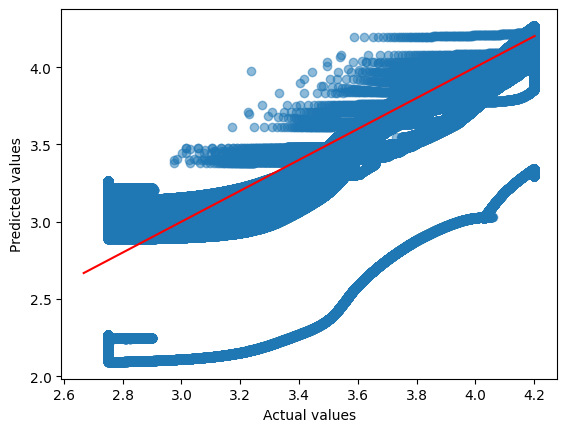

In [ ]:
# Plotting a linear graph
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# Random Forests NEW

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Define the chosen hyperparameters
n_estimators = 200  # Number of trees in the forest
max_depth = 3  # Maximum depth of individual trees
min_samples_split = 2  # Minimum samples required to split a node
min_samples_leaf = 1  # Minimum samples required at each leaf node
max_features = 'sqrt'  # Consider the square root of features

# Create a RandomForestRegressor object with chosen hyperparameters
model = RandomForestRegressor(n_estimators=n_estimators,
                             max_depth=max_depth,
                             min_samples_split=min_samples_split,
                             min_samples_leaf=min_samples_leaf,
                             max_features=max_features,
                             random_state=42)  # For reproducibility


# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., using mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

KeyboardInterrupt: 

# MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# MLP regressor configuration
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
mlp.fit(X_train, y_train)

In [ ]:
# predict on the same dataset
mlp_pred1 = mlp.predict(X_test1)
print(mlp_pred) # print the prediction

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# MLP prediction on another dataset results
r2 = r2_score(y_testmlp1, mlp_pred1)

mse = mean_squared_error(y_testmlp1, mlp_pred1)
mae = mean_absolute_error(y_testmlp1, mlp_pred1)

print("R2 Score:", r2)
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)

In [ ]:
# accuracy of the prediction
1-abs((df1['U[V]'].head(4015)-mlp_pred2[:4015])/df1['U[V]'].head(4015)).mean()

# MLP NEW

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# Define the hyperparameters dictionary
hyperparameters = {
    "hidden_layer_sizes": (32, ),  # Tuple of hidden layer sizes
    "activation": "relu",  # Activation function for hidden layers
    "solver": "adam",  # Solver algorithm for optimization
    "alpha": 0.001,  # Regularization parameter
    "learning_rate": "constant",  # Learning rate schedule
    "learning_rate_init": 0.001,  # Initial learning rate
    "max_iter": 100,  # Maximum number of training iterations
    "batch_size": 64  # Batch size for training
}
def create_model(hyperparameters):

  model = MLPRegressor(**hyperparameters)
  return model


# Get hyperparameters from the dictionary
model_params = hyperparameters.copy()

# Create the model with hyperparameters
model = create_model(model_params)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_predmlp = model.predict(X_test)

In [ ]:
# plot the prediction's error to its number of cycles
number = 16015 # number of cycles
abs(((df1.head(number))-y_pred1[:number])/df1(number)).plot()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# MLP prediction on another dataset results
r2 = r2_score(y_test, y_predmlp)
mse = mean_squared_error(y_test, y_predmlp)
mae = mean_absolute_error(y_test, y_predmlp)

print("R2 Score:", r2)
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)

R2 Score: 0.8970694289145681
Mean Squared Error 0.02886144600138072
Mean Absolute Error 0.11919507447544928


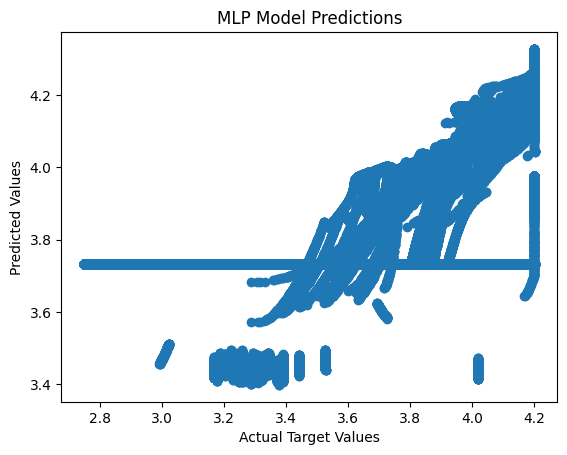

In [ ]:
# Plot actual vs predicted values
plt.scatter(y_test1, y_predmlp)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model Predictions")
plt.show()

# PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#drop the time domain for PCA to work better
dropped_df=df1.drop("Total Time (Seconds)", axis=1)

# Select features for PCA (assuming numerical features)
features = dropped_df.select_dtypes(include=["number"])

# Create a PCA object, specifying the desired number of components
pca = PCA(n_components=2)  # Reduce to 2 dimensions

# Fit PCA to the data
pca.fit(features)

# Transform the data to the new reduced-dimensional space
transformed_data = pca.transform(features)

# Print explained variance ratios for each component
print(pca.explained_variance_ratio_)

[0.98739946 0.01260017]


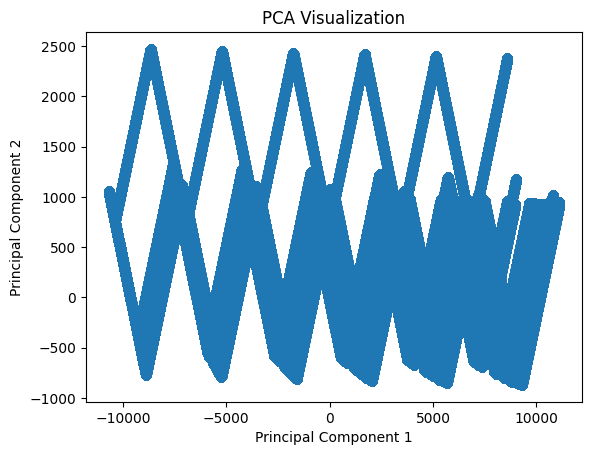

In [ ]:
# Create a scatter plot using the first two principal components
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")

# Shows the plot
plt.show()

In [ ]:
# Shows the number of components in one of the axises
Len(PCA.components[0])

NameError: name 'Len' is not defined

# ISOMAP

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.manifold import Isomap

# Define the number of dimensions for the low-dimensional representation
n_components = 2
# Create and fit the Isomap model
isomap = Isomap(n_components=n_components, n_neighbors=3)

X_isomap = isomap.fit_transform(X_df)

In [ ]:
# Print the shape
print(X_isomap.shape)

# Print the transformed data in the lower dimension
print("Transformed data:", isomap_data)

# t - SNE

In [ ]:
from sklearn.manifold import TSNE

# Create a TSNE object with desired parameters (adjust as needed)
tsne = TSNE(n_components=2, perplexity=5, random_state=111)

# Apply t-SNE to reduce dimensionality
X_tsne = tsne.fit_transform(X_df)

In [ ]:
import matplotlib.pyplot as plt
# Visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)  # Color points by target labels
plt.title('t-SNE Visualization of Battery datasets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()